# NCAA D1 Basketball Transfer Portal Dashboard

Tyler Gorecki  
DS 4003

### Data Background

I chose this dataset because it contains all of the information the UVA Basketball coaching staff would look for when trying to analyze which players to target in the transfer portal. There will be over a thousand players who will enter the portal, many of whom will commit soon after entering, so the coaching staff is limited on the time they can spend analyzing each player. My goal is to create this dashboard containing simple visualizations and easy filtering capabilities that will sort players according to the staff's interests.  

The data comes from Genius Sports data, which is a college sports data collection company. It originally came in the form of many different datasets (similar to a database) which were joined using Metabase software. The conditional columns were calculated based on statistical thresholds that the UVA Basketball coaches would look for in future players. I must note that this was downloaded from Gemini (sports analytics platform) on 2/26, so the data won't update as I work on the dashboard. The goal in the future would be able to pipe the data to the dashboard directly which would allow it to automatically update daily. 

### Load in dataset

In [17]:
# import necessary packages
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

In [18]:
# read in and preview data
data = pd.read_csv('data.csv')
data.head(5)

,Basketball Players New2 - Person → Positionnew,Basketball Players New2 - Person → Height Ft In,Player Eligibility 2024 - Name → Eligibility Year,Basketball Conferences Tiers - Conference → Conference Name,Basketball Conferences Tiers - Conference → Conf Tier,Overall Dataset - Person → Pts/100 Poss,Dataset for conditionals - Person → 3fg% Conditional,Overall Dataset - Person → Reb/100 Poss,Overall Dataset - Person → Blk/40,Dataset for conditionals - Person → Blk/40 Conditional,...,Tv Name,Name,Dataset for conditionals - Person → Rebs/100 Conditional,Dataset for conditionals - Person → 3fga/fga Conditional,Dataset for conditionals - Person → Ft% Conditional,Dataset for conditionals - Person → Pts/100 Conditional,Basketball Teams - Team → Team Name,Assists Turnover Ratio,Three Pointers Percentage,Free Throws Percentage
0,1,"6' 01""",1.0,AAC,Mid,16.418769,0.0,2.736462,0.000000,NaN,...,NaN,Logan Bourgeois,NaN,1.0,0.0,0.0,East Carolina,0.000000,0.333333,0.000000
1,3 | 4,"6' 07""",NaN,America East,Low,NaN,0.0,NaN,0.000000,0.0,...,NaN,Mike Walker,NaN,NaN,0.0,NaN,UAlbany,0.000000,0.000000,0.000000
2,1,"0' 00""",NaN,SWAC,Other,30.879517,0.0,17.645438,0.000000,NaN,...,NaN,Stephon Smith,NaN,0.0,1.0,0.0,Mississippi Val.,0.000000,0.000000,0.750000
3,1 | 2,"6' 04""",4.5,Sun Belt,Mid,19.201080,0.0,6.541027,0.573922,NaN,...,NaN,Maxwell Land,NaN,1.0,1.0,0.0,South Alabama,0.583333,0.243243,0.769231
4,2 | 3,"6' 06""",3.0,ACC,High,20.472326,1.0,8.404429,0.721919,NaN,...,NaN,Kowacie Reeves Jr.,1.0,1.0,1.0,1.0,Georgia Tech,0.696970,0.382114,0.833333


### Data Cleaning

In [19]:
# create new column names
data.columns = ['Position', 'Height', 'EligibilityYear', 'Conference', 'ConfTier', 'Pts100', '3FG_cond', 'Reb100', 'Blk40', 'Blk40_cond', 
                'ATO_cond', '3FGpFGA', 'TV_name', 'Name', 'Reb100_cond', '3FGApFGA_cond', 'FT_cond', 'Pts100_cond', 'Team', 'ATO', '3FG', 'FT']

# drop columns of all NAs
data.drop('TV_name', axis = 1, inplace=True)

# reorder columns
data = data[['Name', 'Team', 'Position', 'Height', 'EligibilityYear', 'Conference', 'ConfTier', 
             'Pts100', 'Reb100', '3FG', '3FGpFGA', 'ATO', 'FT', 'Blk40', 
             'Pts100_cond', 'Reb100_cond', '3FG_cond', '3FGApFGA_cond', 'ATO_cond', 'FT_cond', 'Blk40_cond']]

# modify shooting percentage columns to percentage values (instead of proportions out of 1)
data['3FG'] = data['3FG'] * 100
data['FT'] = data['FT'] * 100

# remove all players that don't have an eligibility year
# this is something that I would look to fix from data source in future but no eligibility year hurts the filtering ability later on
data = data[data.EligibilityYear.isna() == False]

# also removing players without a position, only 5 (likely data connection error from combination of datasets)
data = data[data.Position.isna() == False]

# filling NA values with 0; knowing the data, players of certain position have NA values in their conditional column because we aren't worried about that stat for them
# example is 1s having NA for rebounds and blocks; can adjust for this another way later, but don't want NA values in current dataset
data = data.fillna(0)

# preview data
data.head()

,Name,Team,Position,Height,EligibilityYear,Conference,ConfTier,Pts100,Reb100,3FG,...,ATO,FT,Blk40,Pts100_cond,Reb100_cond,3FG_cond,3FGApFGA_cond,ATO_cond,FT_cond,Blk40_cond
0,Logan Bourgeois,East Carolina,1,"6' 01""",1.0,AAC,Mid,16.418769,2.736462,33.3333,...,0.000000,0.0000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,Maxwell Land,South Alabama,1 | 2,"6' 04""",4.5,Sun Belt,Mid,19.201080,6.541027,24.3243,...,0.583333,76.9231,0.573922,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Kowacie Reeves Jr.,Georgia Tech,2 | 3,"6' 06""",3.0,ACC,High,20.472326,8.404429,38.2114,...,0.696970,83.3333,0.721919,1.0,1.0,1.0,1.0,0.0,1.0,0.0
5,Kowacie Reeves Jr.,Georgia Tech,2 | 3,"6' 06""",3.0,ACC,High,20.472326,8.404429,38.2114,...,0.696970,83.3333,0.721919,1.0,1.0,1.0,1.0,0.0,1.0,0.0
6,Bencao Vungo,East Carolina,3 | 4,"6' 07""",1.0,AAC,Mid,7.939422,9.527307,25.0000,...,0.000000,0.0000,0.000000,0.0,1.0,0.0,1.0,0.0,0.0,0.0


### EDA

In [20]:
# number of players
print("Players: ", len(data))

# number of unique teams
print("Teams: ", len(pd.unique(data.Team)))

# number of unique conferences
print("Conferences: ", len(pd.unique(data.Conference)))

Players:  5095
Teams:  360
Conferences:  33


In [21]:
# number of players in each position group
data.Position.value_counts().sort_index()

Position
1         785
1 | 2    1427
2 | 3    1011
3 | 4     953
4 | 5     919
Name: count, dtype: int64

In [22]:
# number of players in each eligibility year
data.EligibilityYear.value_counts().sort_index()

EligibilityYear
1.0    1098
2.0    1072
3.0    1142
4.0      10
4.5    1085
5.0     649
5.5      39
Name: count, dtype: int64

In [23]:
# distribution of Pts/100 poss, likely right skewed due to players scoring in the very few minutes they play all year
print(data.Pts100.describe())
print('---------------------')

# will be similar distribution for most of those stats, as shown here with 3FG%
print(data['3FG'].describe())

# these distributions would also be better seen with plots (density, box, etc.) later on

count    5095.000000
mean       17.026650
std        10.618936
min         0.000000
25%        11.156960
50%        17.839670
75%        23.536045
max       124.902420
Name: Pts100, dtype: float64
---------------------
count    5095.000000
mean       25.236858
std        18.374274
min         0.000000
25%         7.142900
50%        29.545500
75%        36.144600
max       100.000000
Name: 3FG, dtype: float64


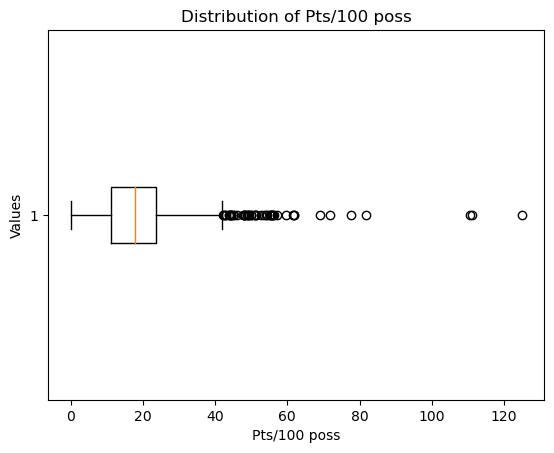

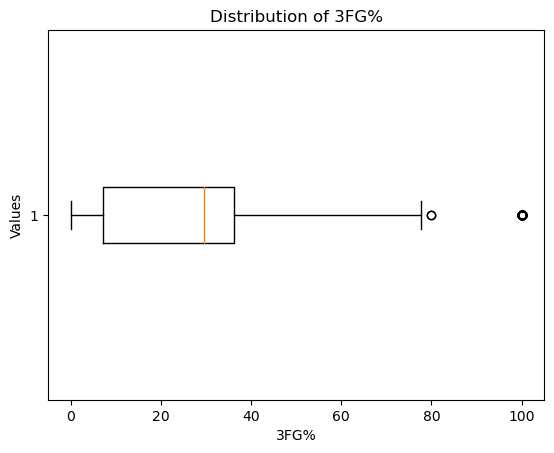

In [24]:
# boxplot of distribution of Pts/100 poss
plt.boxplot(data.Pts100, vert=False)
plt.title('Distribution of Pts/100 poss')
plt.xlabel('Pts/100 poss')
plt.ylabel('Values')
plt.show()

# boxplot of distribution of 3FG%
plt.boxplot(data['3FG'], vert=False)
plt.title('Distribution of 3FG%')
plt.xlabel('3FG%')
plt.ylabel('Values')
plt.show()

# I would expect these distributions to be consistent among most stats with my basketball knowledge background
# this is okay, but it is just something interesting to keep in mind as I progress through dashboard creation
# some players may seem to stand out due to their 100% 3FG but that's not something that can be continued no matter how good you are

### Data dictionary

Player Info
- Name: player name
- Team: player team from most recent season
- Position: player position (determined based on height thresholds set by UVA coaches)
- Height: player height (ft and in)
- EligibilityYear: number of years the player has played college basketball (+0.5 indicates extra covid year of eligibility)
- Conference: player's team's conference
- ConfTier: tier of the conference the player plays in (pre-determined by UVA coaches)

Player Statistics
- Pts100: points scored per 100 possessions played
- Reb100: rebounds per 100 possessions played
- 3FG: three point field goal percentage
- 3FGpFGA: number of three pointers attempted per all field goals attempted
- ATO: assist to turnover ratio (assists divided by turnovers)
- FT: free throw shooting percentage
- Blk40: blocks per 40 minutes

The remaining variables are all 'conditionals' which is a binary variable (0/1) indicating whether the threshold was reached for the above statistics (based on position and conference tier)
- Pts100_cond
- Reb100_cond
- 3FG_cond
- 3FGApFGA_cond
- ATO_cond
- FT_cond
- Blk40_cond

### UI components
- Tabs that go between different pages (individual, team, each position)
- Filters at the top of the page to change what is shown on each page
- UVA colored dashboard to match the team theme
- Premade graphs to show basic info that can be used to filter top prospects
- Info tables to allow sorting based on multiple statistics
- Dropdown boxes to allow user to create own plots

### Data Visualizations
- Pts/100 poss vs. 3FG%, will show shooting ability and accuracy for most players
- 3FGA/FGA vs. 3FG%, will show 3-point shooting volume and performance
- Reb/100 poss vs. Blk/40 min, will show the effectiveness of big men at defending
- Pts/100 poss vs. A/TO, will show scoring ability compared to passing ability (would mainly look at this for 1s or 2s)
- Scoring average distributions by position/conference could allow us to generate better thresholds for coaches